## Stock Sentiment Analysis using News Headlines

<h3>Library import

In [1]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score## Import library to check accuracy


In [2]:
df=pd.read_csv('Data.csv', encoding = "ISO-8859-1") #file read

In [3]:
df.head()# head print

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2000-01-03,0,A 'hindrance to operations': extracts from the...,Scorecard,Hughes' instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl's successor drawn into scandal,The difference between men and women,"Sara Denver, nurse turned solicitor",Diana's landmine crusade put Tories in a panic,Yeltsin's resignation caught opposition flat-f...,Russian roulette,Sold out,Recovering a title
1,2000-01-04,0,Scorecard,The best lake scene,Leader: German sleaze inquiry,"Cheerio, boyo",The main recommendations,Has Cubie killed fees?,Has Cubie killed fees?,Has Cubie killed fees?,...,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man's extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn't know without the ...,Millennium bug fails to bite
2,2000-01-05,0,Coventry caught on counter by Flo,United's rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,...,South Melbourne (Australia),Necaxa (Mexico),Real Madrid (Spain),Raja Casablanca (Morocco),Corinthians (Brazil),Tony's pet project,Al Nassr (Saudi Arabia),Ideal Holmes show,Pinochet leaves hospital after tests,Useful links
3,2000-01-06,1,Pilgrim knows how to progress,Thatcher facing ban,McIlroy calls for Irish fighting spirit,Leicester bin stadium blueprint,United braced for Mexican wave,"Auntie back in fashion, even if the dress look...",Shoaib appeal goes to the top,Hussain hurt by 'shambles' but lays blame on e...,...,Putin admits Yeltsin quit to give him a head s...,BBC worst hit as digital TV begins to bite,How much can you pay for...,Christmas glitches,"Upending a table, Chopping a line and Scoring ...","Scientific evidence 'unreliable', defence claims",Fusco wins judicial review in extradition case,Rebels thwart Russian advance,Blair orders shake-up of failing NHS,Lessons of law's hard heart
4,2000-01-07,1,Hitches and Horlocks,Beckham off but United survive,Breast cancer screening,Alan Parker,Guardian readers: are you all whingers?,Hollywood Beyond,Ashes and diamonds,Whingers - a formidable minority,...,Most everywhere: UDIs,Most wanted: Chloe lunettes,Return of the cane 'completely off the agenda',From Sleepy Hollow to Greeneland,Blunkett outlines vision for over 11s,"Embattled Dobson attacks 'play now, pay later'...",Doom and the Dome,What is the north-south divide?,Aitken released from jail,Gone aloft


<p>In the above data are show as:
There are 27 Columns are Date,Label Columns have 1 or 0 where 1 for Positive review and 0 for Negative ,and othe columns have news headline </p>

<b>Date Format

In [4]:
# Date Columns change into date formate
df["Date"] = pd.to_datetime(df["Date"])

In [5]:

train = df[df["Date"] < "2015-01-01"]
test  = df[df["Date"] > "2014-12-31"]
#In train all rows before 01-Jan-2015
#In test all rows from 01-Jan-2015 onward
train.shape, test.shape


((3723, 27), (378, 27))

<b>Count total number of postive and negative 

In [6]:

positive_count = (df["Label"] == 1).sum()
negative_count = (df["Label"] == 0).sum()
print("positive_count=",positive_count,"negative_count=",negative_count)


positive_count= 2166 negative_count= 1935


<b>Couunt plot 

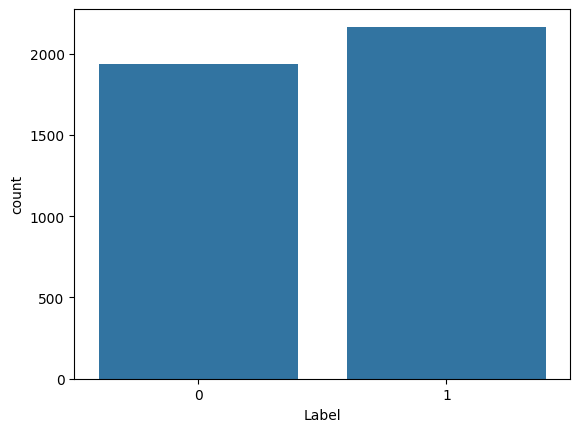

In [7]:

sns.countplot(x=df["Label"])
plt.show()


<p>In the above graph display the count of postive and negative review </p>

<b>Group by the year 

In [8]:
df["Year"] = df["Date"].dt.year # extracting year 
year_counts= df.groupby("Year")["Label"].value_counts().unstack().fillna(0)


<Figure size 10000x15000 with 0 Axes>

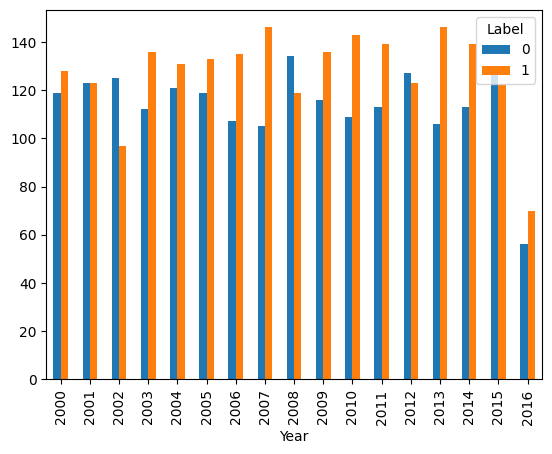

In [9]:
plt.figure(figsize=(100,150))
year_counts.plot(kind="bar")
plt.show()

Display the count per year positive and negative 

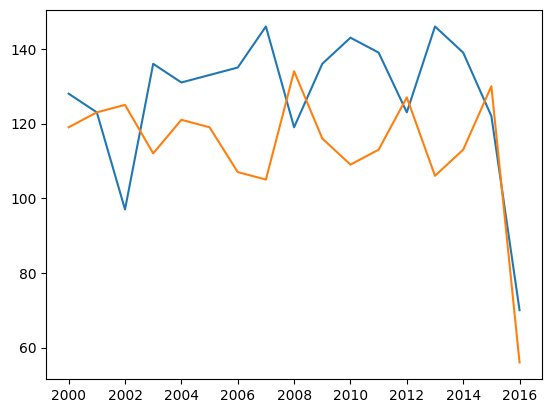

In [10]:
year_positive = df[df["Label"] == 1].groupby("Year").size()
year_negative = df[df["Label"] == 0].groupby("Year").size()
plt.plot(year_positive.index, year_positive.values)
plt.plot(year_negative.index, year_negative.values)
plt.show()


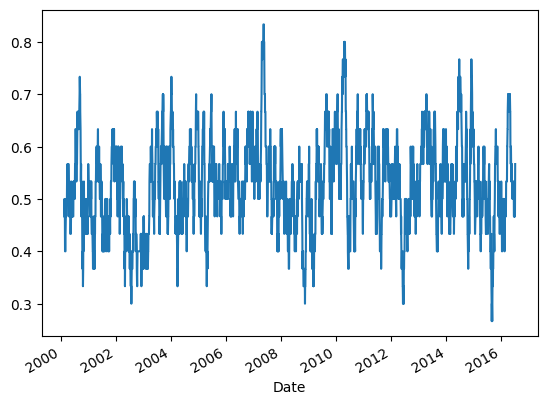

In [11]:
df["Sentiment"] = df["Label"]   # if already sentiment
df["rolling"] = df["Sentiment"].rolling(30).mean()

df.set_index("Date")["rolling"].plot()
plt.show()


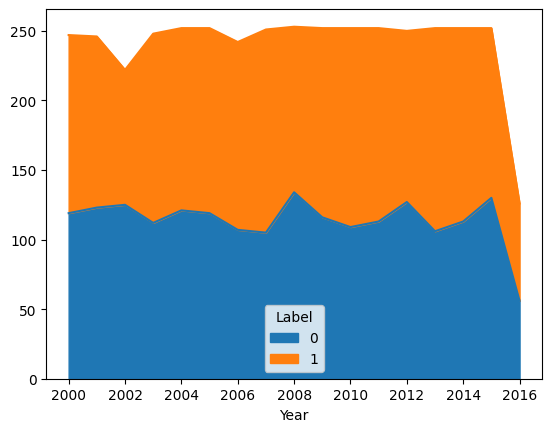

In [12]:
year_counts = df.groupby(["Year","Label"]).size().unstack().fillna(0)
year_counts.plot(kind="area", stacked=True)
plt.show()


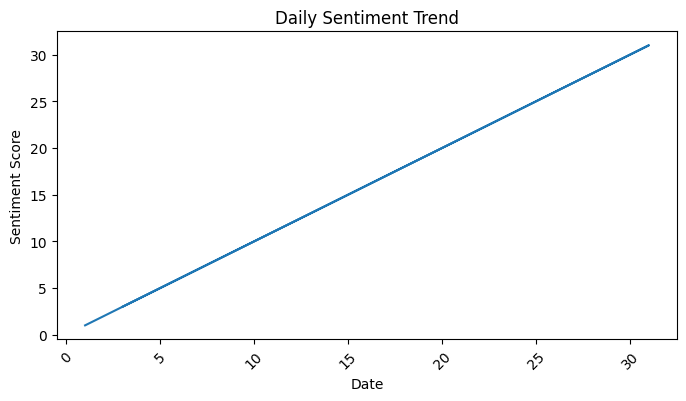

In [13]:

df["Date"] = df["Date"].dt.day 
plt.figure(figsize=(8,4))
plt.plot(df["Date"], df["Date"])
plt.title("Daily Sentiment Trend")
plt.xlabel("Date")
plt.ylabel("Sentiment Score")
plt.xticks(rotation=45)
plt.show()


In [14]:
#train = df[df['Date'] < '20150101']
#test = df[df['Date'] > '20141231']

In [15]:
# Removing punctuations
data=train.iloc[:,2:27]
data.replace("[^a-zA-Z]"," ",regex=True, inplace=True)

# Renaming column names for ease of access
list1= [i for i in range(25)]
new_Index=[str(i) for i in list1]
data.columns= new_Index
data.head(5)



,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,A hindrance to operations extracts from the...,Scorecard,Hughes instant hit buoys Blues,Jack gets his skates on at ice cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,Derby raise a glass to Strupar s debut double,Southgate strikes Leeds pay the penalty,...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl s successor drawn into scandal,The difference between men and women,Sara Denver nurse turned solicitor,Diana s landmine crusade put Tories in a panic,Yeltsin s resignation caught opposition flat f...,Russian roulette,Sold out,Recovering a title
1,Scorecard,The best lake scene,Leader German sleaze inquiry,Cheerio boyo,The main recommendations,Has Cubie killed fees,Has Cubie killed fees,Has Cubie killed fees,Hopkins furious at Foster s lack of Hannibal...,Has Cubie killed fees,...,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man s extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn t know without the ...,Millennium bug fails to bite
2,Coventry caught on counter by Flo,United s rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,McGrath puts India out of their misery,Blair Witch bandwagon rolls on,...,South Melbourne Australia,Necaxa Mexico,Real Madrid Spain,Raja Casablanca Morocco,Corinthians Brazil,Tony s pet project,Al Nassr Saudi Arabia,Ideal Holmes show,Pinochet leaves hospital after tests,Useful links
3,Pilgrim knows how to progress,Thatcher facing ban,McIlroy calls for Irish fighting spirit,Leicester bin stadium blueprint,United braced for Mexican wave,Auntie back in fashion even if the dress look...,Shoaib appeal goes to the top,Hussain hurt by shambles but lays blame on e...,England s decade of disasters,Revenge is sweet for jubilant Cronje,...,Putin admits Yeltsin quit to give him a head s...,BBC worst hit as digital TV begins to bite,How much can you pay for,Christmas glitches,Upending a table Chopping a line and Scoring ...,Scientific evidence unreliable defence claims,Fusco wins judicial review in extradition case,Rebels thwart Russian advance,Blair orders shake up of failing NHS,Lessons of law s hard heart
4,Hitches and Horlocks,Beckham off but United survive,Breast cancer screening,Alan Parker,Guardian readers are you all whingers,Hollywood Beyond,Ashes and diamonds,Whingers a formidable minority,Alan Parker part two,Thuggery Toxins and Ties,...,Most everywhere UDIs,Most wanted Chloe lunettes,Return of the cane completely off the agenda,From Sleepy Hollow to Greeneland,Blunkett outlines vision for over s,Embattled Dobson attacks play now pay later ...,Doom and the Dome,What is the north south divide,Aitken released from jail,Gone aloft


<b>convert headline in lower-case 

In [16]:
# Convertng headlines to lower case
for index in new_Index:
    data[index]=data[index].str.lower()
data.head(1)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,a hindrance to operations extracts from the...,scorecard,hughes instant hit buoys blues,jack gets his skates on at ice cold alex,chaos as maracana builds up for united,depleted leicester prevail as elliott spoils e...,hungry spurs sense rich pickings,gunners so wide of an easy target,derby raise a glass to strupar s debut double,southgate strikes leeds pay the penalty,...,flintoff injury piles on woe for england,hunters threaten jospin with new battle of the...,kohl s successor drawn into scandal,the difference between men and women,sara denver nurse turned solicitor,diana s landmine crusade put tories in a panic,yeltsin s resignation caught opposition flat f...,russian roulette,sold out,recovering a title


<b>Join the columns date wise 

In [17]:
' '.join(str(x) for x in data.iloc[1,0:25])

'scorecard the best lake scene leader  german sleaze inquiry cheerio  boyo the main recommendations has cubie killed fees  has cubie killed fees  has cubie killed fees  hopkins  furious  at foster s lack of hannibal appetite has cubie killed fees  a tale of two tails i say what i like and i like what i say elbows  eyes and nipples task force to assess risk of asteroid collision how i found myself at last on the critical list the timing of their lives dear doctor irish court halts ira man s extradition to northern ireland burundi peace initiative fades after rebels reject mandela as mediator pe points the way forward to the ecb campaigners keep up pressure on nazi war crimes suspect jane ratcliffe yet more things you wouldn t know without the movies millennium bug fails to bite'

In [18]:
headlines = []
for row in range(0,len(data.index)):
    headlines.append(' '.join(str(x) for x in data.iloc[row,0:25]))

In [19]:
headlines[0]

'a  hindrance to operations   extracts from the leaked reports scorecard hughes  instant hit buoys blues jack gets his skates on at ice cold alex chaos as maracana builds up for united depleted leicester prevail as elliott spoils everton s party hungry spurs sense rich pickings gunners so wide of an easy target derby raise a glass to strupar s debut double southgate strikes  leeds pay the penalty hammers hand robson a youthful lesson saints party like it s      wear wolves have turned into lambs stump mike catches testy gough s taunt langer escapes to hit     flintoff injury piles on woe for england hunters threaten jospin with new battle of the somme kohl s successor drawn into scandal the difference between men and women sara denver  nurse turned solicitor diana s landmine crusade put tories in a panic yeltsin s resignation caught opposition flat footed russian roulette sold out recovering a title'

<b>BAG OF WORDS

In [20]:
## implement BAG OF WORDS
countvector=CountVectorizer(ngram_range=(2,2))
traindataset=countvector.fit_transform(headlines)

In [21]:
# implement RandomForest Classifier
randomclassifier=RandomForestClassifier(n_estimators=200,criterion='entropy')
randomclassifier.fit(traindataset,train['Label'])

,n_estimators,200
,criterion,'entropy'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [22]:
## Predict for the Test Dataset
test_transform= []
for row in range(0,len(test.index)):
    test_transform.append(' '.join(str(x) for x in test.iloc[row,2:27]))
test_dataset = countvector.transform(test_transform)
predictions = randomclassifier.predict(test_dataset)

In [23]:
## Import library to check accuracy
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [24]:
matrix=confusion_matrix(test['Label'],predictions)
print(matrix)
score=accuracy_score(test['Label'],predictions)
print(score)
report=classification_report(test['Label'],predictions)
print(report)

[[ 14 172]
 [ 14 178]]
0.5079365079365079
              precision    recall  f1-score   support

           0       0.50      0.08      0.13       186
           1       0.51      0.93      0.66       192

    accuracy                           0.51       378
   macro avg       0.50      0.50      0.39       378
weighted avg       0.50      0.51      0.40       378



In [25]:
print(".................................................")

.................................................


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4101 entries, 0 to 4100
Data columns (total 30 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4101 non-null   int32  
 1   Label      4101 non-null   int64  
 2   Top1       4101 non-null   object 
 3   Top2       4101 non-null   object 
 4   Top3       4101 non-null   object 
 5   Top4       4101 non-null   object 
 6   Top5       4101 non-null   object 
 7   Top6       4101 non-null   object 
 8   Top7       4101 non-null   object 
 9   Top8       4101 non-null   object 
 10  Top9       4101 non-null   object 
 11  Top10      4101 non-null   object 
 12  Top11      4101 non-null   object 
 13  Top12      4101 non-null   object 
 14  Top13      4101 non-null   object 
 15  Top14      4101 non-null   object 
 16  Top15      4101 non-null   object 
 17  Top16      4101 non-null   object 
 18  Top17      4101 non-null   object 
 19  Top18      4101 non-null   object 
 20  Top19   

In [27]:
df.dropna(inplace=True)

# Merge all headline columns
headline_cols = [f"Top{i}" for i in range(1, 26)]
df["headlines"] = df[headline_cols].apply(lambda x: " ".join(x.astype(str)), axis=1)

# Now create X and y from same df
X = df["headlines"]
y = df["Sentiment"]

print(len(X), len(y))


4069 4069


In [28]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Bag of Words (2-grams)
countvector = CountVectorizer(ngram_range=(2, 2))
X = countvector.fit_transform(X)   # Features (text → vector)

# Numeric target (Sentiment column exists)

# Train/Test Split (time-aware)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, shuffle=False
)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predictions
y_pred = lr.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression - MSE: {mse:.4f}, R²: {r2:.4f}")


Linear Regression - MSE: 0.2645, R²: -0.0622


In [29]:
# Build headlines
headline_cols = [f"Top{i}" for i in range(1, 26)]
df["headlines"] = df[headline_cols].astype(str).agg(" ".join, axis=1)

X = df["headlines"]           # <-- text only
y = df["Sentiment"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


<b>Pip line 

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

model = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1,2), stop_words='english')),
    ('lr', LogisticRegression(max_iter=2000))
])

model.fit(X_train, y_train)


,steps,"[('tfidf', ...), ('lr', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


In [31]:


# Predict on test data
y_pred = model.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

# Detailed Classification Report
print(classification_report(y_test, y_pred))


Accuracy: 0.5135135135135135
              precision    recall  f1-score   support

           0       0.45      0.16      0.23       384
           1       0.52      0.83      0.64       430

    accuracy                           0.51       814
   macro avg       0.49      0.49      0.44       814
weighted avg       0.49      0.51      0.45       814

